In [1]:
import numpy as np
import matplotlib.pyplot as plt

from absent_minded_driver import Absent_Minded_Driver
from evidential_blackmail import Evidential_Blackmail
from general2by2game import General2by2
from death_in_damascus import Death_In_Damascus
from prisoners_dilemma_against_copy import Prisoners_Dilemma_against_copy
from agents import *


In [112]:
exponential_cooling = lambda n: 100*0.99**(n/2)

exploration_scheme = More_Advanced_Softmax(exponential_cooling)
learning_scheme = Identity_Function()
decision_problem = Prisoners_Dilemma_against_copy()

agent = More_Advanced_Agent(exploration_scheme, learning_scheme, decision_problem)

In [109]:
1000*0.99**1000

0.043171247410657865

In [117]:
iterations = 1
epochs = 1000
batch_size = 1

for i in range(iterations):

    agent = More_Advanced_Agent(exploration_scheme, learning_scheme, decision_problem)
    expected_utilities = []
    action_probabilities = []

    for j in range(epochs):
        history = decision_problem.run(agent, batch_size)
        agent.learn_from(history)
        
        expected_utilities.append(np.array([agent.expected_utility['START']['Cooperate'],
                                            agent.expected_utility['START']['Defect'],
                                           ]))
        action_probabilities.append(agent.get_action_distribution('START'))
        
expected_utilities = np.vstack(expected_utilities)
action_probabilities = np.vstack(action_probabilities)

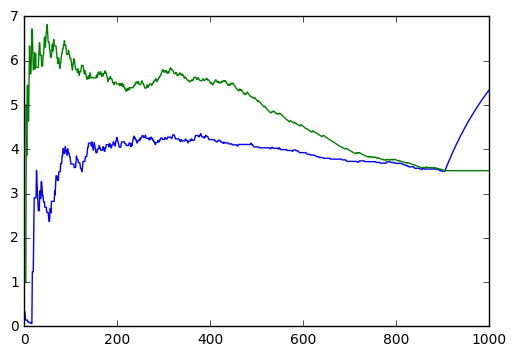

In [116]:
plt.plot(range(epochs),expected_utilities[:,0],range(epochs),expected_utilities[:,1])
plt.show()

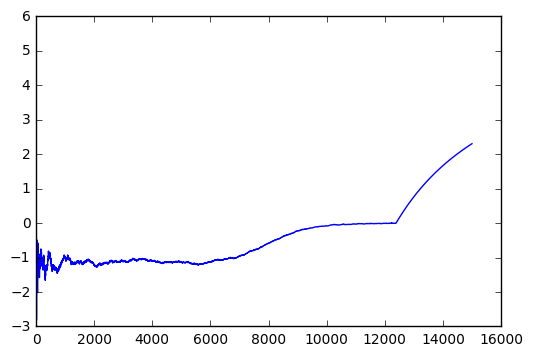

In [84]:
plt.plot(range(epochs),expected_utilities[:,0]-expected_utilities[:,1])
plt.show()

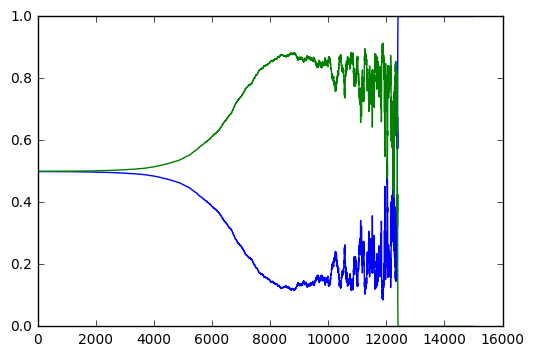

In [78]:
plt.plot(range(epochs),action_probabilities[:,0],range(epochs),action_probabilities[:,1])
plt.show()

In [28]:
list(enumerate(['a','b']))

[(0, 'a'), (1, 'b')]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


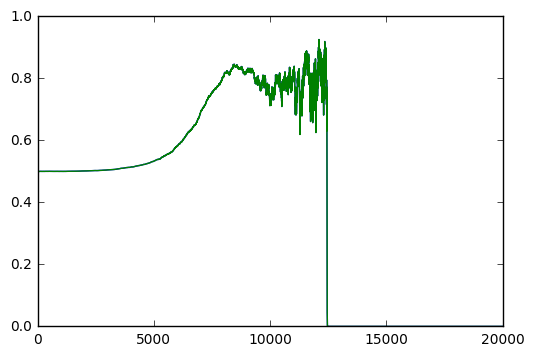

In [68]:
calc_prob=[1/(1+np.exp(x/exponential_cooling(2*n))) for (n,x) in enumerate(expected_utilities[:,0]-expected_utilities[:,1])]
plt.plot(range(epochs),action_probabilities[:,1], range(epochs),calc_prob)
plt.show()

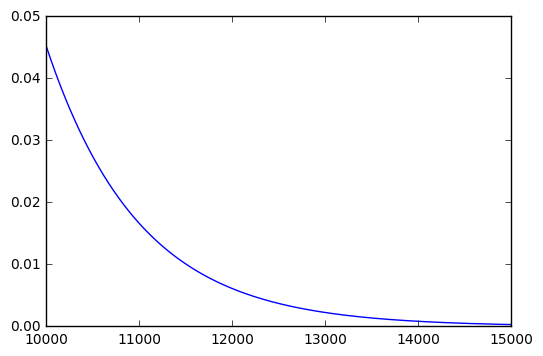

In [80]:
start=10000
plt.plot(range(start,epochs),[exponential_cooling(2*n) for n in range(start,epochs)])
plt.show()

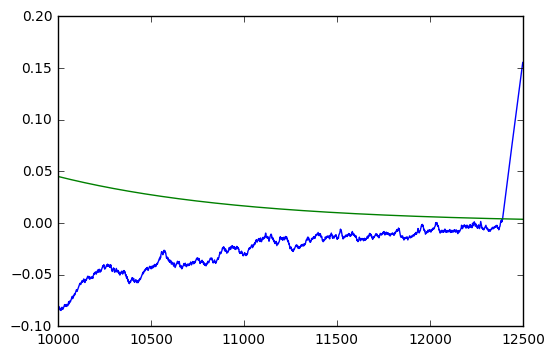

In [91]:
start=10000
stop=12500
plt.plot(range(start,stop),expected_utilities[start:stop,0]-expected_utilities[start:stop,1],
         range(start,stop),[exponential_cooling(2*n) for n in range(start,stop)])
plt.show()

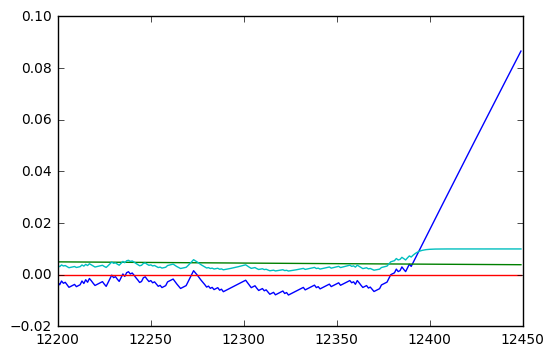

In [101]:
start=12200
stop=12450
plt.plot(range(start,stop),expected_utilities[start:stop,0]-expected_utilities[start:stop,1],
         range(start,stop),[exponential_cooling(2*n) for n in range(start,stop)],
         range(start,stop),[0 for n in range(start,stop)],
         range(start,stop), 0.01*action_probabilities[start:stop,0]
        )
plt.show()

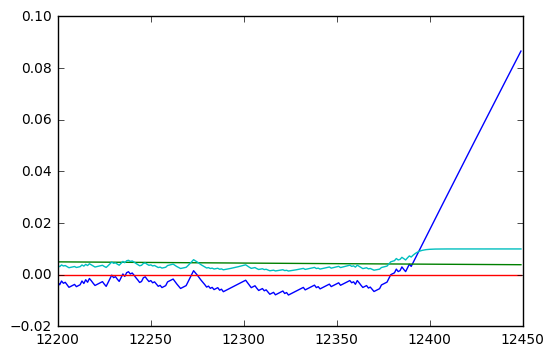

In [101]:
start=12200
stop=12450
plt.plot(range(start,stop),expected_utilities[start:stop,0]-expected_utilities[start:stop,1],
         range(start,stop),[exponential_cooling(2*n) for n in range(start,stop)],
         range(start,stop),[0 for n in range(start,stop)],
         range(start,stop), 0.01*action_probabilities[start:stop,0]
        )
plt.show()